In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.shape

(39644, 61)

In [5]:
df.dtypes

url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

# Clean The Data

In [6]:
#Check for missing numbers

missing_values = df[df.isnull().any(axis=1)]
missing_values.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares


In [7]:
max(missing_values.isna().sum())

0

##### There are no missing values, and the data set appears to be super clean, with dummies already included.

In [8]:
#Reverse-clean for visualization purposes
df_rev = df.copy()
df_rev.columns = df_rev.columns.str.replace(' ','')

In [9]:
df_rev.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [10]:
df_rev['Channel'] = 'Other'

In [11]:
col_channel = {'data_channel_is_lifestyle':'Lifestyle','data_channel_is_entertainment':'Entertainment',
               'data_channel_is_bus':'Business',
               'data_channel_is_socmed':'Social_Media', 'data_channel_is_tech':"Tech",
               'data_channel_is_world':'World'}

for i in col_channel.keys():
    df_rev['Channel'] = np.where(df_rev[i]==1.0, col_channel[i],df_rev['Channel'])


In [ ]:
df_rev[df_rev['Channel']=='0']['url']

In [ ]:
df_rev['Channel'].value_counts()

In [ ]:
day_channel = {'weekday_is_monday':'Monday', 'weekday_is_tuesday':'Tuesday',
       'weekday_is_wednesday':'Wednesday', 'weekday_is_thursday':'Thursday', 'weekday_is_friday':'Friday',
       'weekday_is_saturday':'Saturday', 'weekday_is_sunday':'Sunday'}

df_rev['Day_of_Week'] = None

for i in day_channel.keys():
    df_rev['Day_of_Week'] = np.where(df_rev[i]==1, day_channel[i],df_rev['Day_of_Week'])

In [ ]:
cols_drop = ['weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday','data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

df_rev.drop(columns=cols_drop, inplace=True)

In [ ]:
df_rev.shape



# Visualize

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.title('Correlation matrix',fontsize=24)

plt.show()

In [ ]:
df_rev.shape

In [ ]:
df_rev['Channel'].isna().sum()

In [ ]:
df_agg_C = df_rev.groupby(['Channel'])['shares'].agg(['mean','sum',np.size]).reset_index()

In [ ]:
df_agg_C.set_index('Channel',inplace=True)

In [ ]:
df_agg_C.sort_values(by='mean',inplace=True, ascending=False)
df_agg_C

In [ ]:
cross = pd.crosstab(df_rev.Channel,df_rev.Day_of_Week)


In [ ]:
cross.sum()

In [ ]:
colors1 = sns.color_palette("GnBu_d", len(df_agg_C.index))
colors2 = sns.color_palette("BuGn_d", len(df_agg_C.index))

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,5))
df_agg_C = df_agg_C[df_agg_C.index != 'Other']

ax = sns.barplot(y = df_agg_C.index, x = df_agg_C['mean'], orient='h', palette = colors1, ax=ax1)
ax = sns.barplot(y = df_agg_C.index, x = df_agg_C['size'], orient='h', palette = colors2, ax=ax2)

ax1.set_xlabel(xlabel='Average Number of Shares per Article', fontsize=16)
ax1.set_ylabel(ylabel="Channel", fontsize=16)
ax1.set_title(label="Average Number of Shares on Social per Article, by Channel", fontsize=22)

ax2.set_xlabel(xlabel='Number of Articles', fontsize=16)
ax2.set_ylabel(ylabel="Channel", fontsize=16)
ax2.set_title(label="Count of Articles", fontsize=22)


plt.show()

In [ ]:
df_agg2 = df_rev.groupby(['Day_of_Week'])['shares'].agg(['mean','sum',np.size])
df_agg2 = df_agg2.sort_values('mean',ascending=False)

In [ ]:
df_agg2

In [ ]:
sns.set()

In [ ]:
colors1 = sns.color_palette("Blues_d", len(df_agg2.index))
colors2 = sns.color_palette("BuGn_d", len(df_agg2.index))

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,5))

plt.figure(figsize=(16,8))

ax = sns.barplot(y = df_agg2.index, x = df_agg2['mean'], orient='h', palette = colors1, ax=ax1)
ax = sns.barplot(y = df_agg2.index, x = df_agg2['size'], orient='h', palette = colors2, ax=ax2)

ax1.set_xlabel(xlabel='Average Number of Sharesper Article, by Day of Week Released', fontsize=16)
ax1.set_ylabel(ylabel="Day", fontsize=16)
ax1.set_title(label="Average Number of Shares on Social per Article", fontsize=24)

ax2.set_xlabel(xlabel='Number of Articles by Day Released', fontsize=16)
ax2.set_ylabel(ylabel="Day", fontsize=16)
ax2.set_title(label="Count of Articles", fontsize=24)


plt.show()

In [ ]:
cross = cross[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
plt.figure(figsize=(16,8))
sns.heatmap(cross,cmap="viridis", annot=True, fmt="d")
plt.title('Total Number of Articles',fontsize=24)

plt.show()

In [ ]:
df_rev1 = df_rev[df_rev['Channel']!='Other']

ch = ['Entertainment','Business','Tech','Lifestyle','World','Social_Media']


medians = df_rev1.groupby(['Channel'])['shares'].median()
medians = medians[ch].values

median_labels = [str(np.round(s, 2)) for s in medians]


means = df_rev1.groupby(['Channel'])['shares'].mean()
means = means[ch].values
mean_labels = [str(np.round(s, 2)) for s in means]

plt.figure(figsize=(18,9))

ax = sns.boxplot(x=df_rev1['Channel'], y=df_rev1['shares'],data=df_rev1, hue='is_weekend', palette='RdPu', 
                 showfliers=False, showmeans=True, linewidth=3.)
ax.set_ylabel(ylabel='# Shares on Social', fontsize=20)
ax.set_title(label='Article Shares by Channel', fontsize=20)

leg = ax.get_legend()

new_title = 'Weekend?'
leg.set_title(new_title)
new_labels = ['No', 'Yes']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
    
plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick], f'med={median_labels[tick]}', 
            horizontalalignment='center', size='x-small', color='c', weight='semibold',fontsize=20)
    ax.text(pos[tick], means[tick], f'mean={mean_labels[tick]}', 
            horizontalalignment='center', size='x-small', color='g', weight='bold',fontsize=20)

plt.show()

In [ ]:
plt.figure(figsize=(16,8))



ax = sns.scatterplot(x='shares',y='n_tokens_content',data=df_rev, hue='is_weekend') #Hue
ax.set_ylabel(ylabel='Article Word Count', fontsize=16)
ax.set_xlabel(xlabel='Number of Shares', fontsize=16)
ax.set_title(label='Shares by Length of Article', fontsize=20)


plt.show()

In [ ]:
plt.figure(figsize=(16,8))



ax = sns.scatterplot(x='shares',y='num_videos',data=df_rev, hue='is_weekend') #Hue
ax.set_ylabel(ylabel='Article Video Count', fontsize=16)
ax.set_xlabel(xlabel='Number of Shares', fontsize=16)
ax.set_title(label='Shares by Number of Videos', fontsize=20)


plt.show()

In [ ]:
plt.figure(figsize=(16,8))



ax = sns.scatterplot(x='shares',y='num_imgs',data=df_rev, hue='is_weekend') #Hue
ax.set_ylabel(ylabel='Article Image Count', fontsize=16)
ax.set_xlabel(xlabel='Number of Shares', fontsize=16)
ax.set_title(label='Shares by Number of Images', fontsize=20)


plt.show()

In [ ]:
df_rev['num_imgs'].describe()

# Remove Outliers

In [12]:
#def iqr_fun():
    
for i in ['shares']:
    Q25 = df_rev[i].quantile(0.25)
    Q75 = df_rev[i].quantile(0.75)
    IQR = Q75-Q25
    sMaxQ = Q75+1.5*IQR
    sMinQ = max(Q25-1.5*IQR,0.0)
    print(sMinQ, sMaxQ)

0.0 5581.0


In [ ]:
#df_revO = df_rev[(df_rev['shares']<MaxQ) & (df_rev['shares']>MinQ)  ]

In [13]:
df_rev.shape

(39644, 62)

In [14]:
df_rev['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

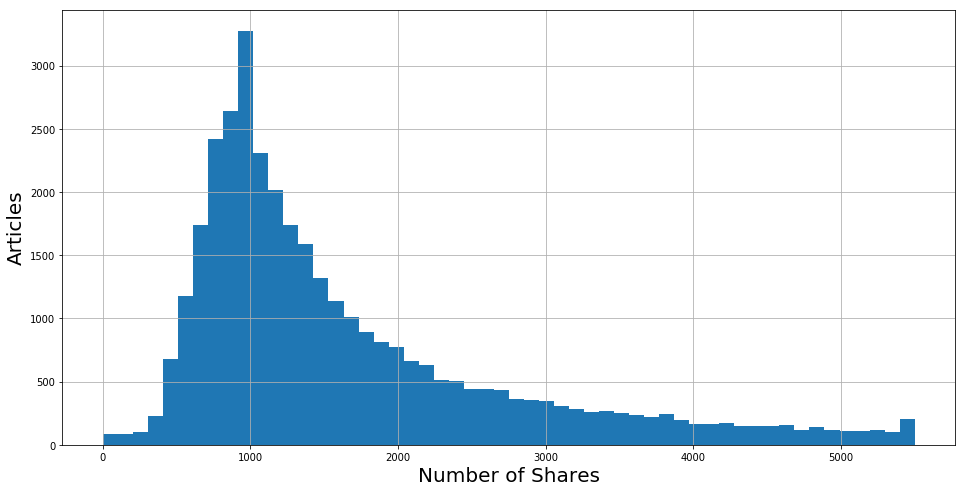

In [15]:
plt.figure(figsize=(16,8))

df1 = df_rev[(df_rev['shares']<sMaxQ) & (df_rev['shares']>sMinQ)  ]

ax= df1['shares'].hist(bins=54)
   
ax.set_ylabel('Articles', fontsize=20)
ax.set_xlabel('Number of Shares', fontsize=20)

plt.show()

#### Number of Words in Article

In [16]:
sns.set()

In [17]:
#def iqr_fun():
    
for i in ['n_tokens_content']:
    Q25 = df_rev[i].quantile(0.25)
    Q75 = df_rev[i].quantile(0.75)
    IQR = Q75-Q25
    MaxQ = Q75+1.5*IQR
    MinQ = max(Q25-1.5*IQR,0.0)
    print(MinQ, MaxQ)

0.0 1421.0


In [ ]:
df_revO = df_rev[(df_rev['n_tokens_content']<MaxQ) & (df_rev['n_tokens_content']>MinQ)  ]

In [ ]:
df_rev.shape

In [ ]:
plt.figure(figsize=(16,8))


ax= df_revO['n_tokens_content'].hist(bins=54)
   
ax.set_ylabel('Articles', fontsize=20)
ax.set_xlabel('Number of Words', fontsize=20)

plt.show()

In [ ]:
for i in ['num_videos']:
    Q25 = df_rev[i].quantile(0.25)
    Q75 = df_rev[i].quantile(0.75)
    IQR = Q75-Q25
    MaxQ = Q75+2*IQR
    MinQ = max(Q25-1.5*IQR,0.0)
    print(MinQ, MaxQ)

In [ ]:
df_revO = df_revO[(df_revO['num_videos']<=MaxQ) & (df_revO['num_videos']>=MinQ)  ]

In [ ]:
df_revO.shape

In [ ]:
plt.figure(figsize=(16,8))

ax= df_revO['num_videos'].hist(bins=4)
   
ax.set_ylabel('Articles', fontsize=20)
ax.set_xlabel('Number of Videos', fontsize=20)

plt.show()

# Develop Model for Analysis

In [18]:
df.columns = df.columns.str.replace(' ','')

In [19]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [20]:
dff = df.copy()

def iqr_fun(i,dff):
    Q25 = dff[i].quantile(0.25)
    Q75 = dff[i].quantile(0.75)
    IQR = Q75-Q25
    MaxQ = round(Q75+1.5*IQR,0)+1
    MinQ = round((Q25-1.5*IQR),0)-1
    print(MinQ, MaxQ)
    return [MinQ, MaxQ]

In [21]:
dff.shape

(39644, 61)

In [ ]:
#dff['kw_min_min'].value_counts()

In [22]:
columns_out = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords',
              'kw_min_min', 'kw_max_min',"kw_avg_min", "kw_min_max", "kw_max_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares",
               "self_reference_avg_sharess"]

for n in columns_out:
    print(n)
    
    q = iqr_fun(n,dff)
    #print(q)
    
    dff = dff[(dff[n]<=q[1]) & (dff[n]>=q[0])  ]
    
    #print(dff.shape)

n_tokens_title
3.0 17.0
n_tokens_content
-460.0 1422.0
num_hrefs
-11.0 27.0
num_self_hrefs
-5.0 9.0
num_imgs
-1.0 5.0
num_videos
-3.0 3.0
num_keywords
1.0 15.0
kw_min_min
-9.0 13.0
kw_max_min
-419.0 1851.0
kw_avg_min
-127.0 533.0
kw_min_max
-12601.0 21001.0
kw_max_max
843299.0 843301.0
kw_avg_max
9624.0 521906.0
kw_min_avg
-2367.0 3944.0
kw_max_avg
887.0 7933.0
kw_avg_avg
1092.0 4223.0
self_reference_min_shares
-1896.0 4978.0
self_reference_max_shares
-4169.0 9221.0
self_reference_avg_sharess
-1876.0 4966.0


In [23]:
dff.shape

(10793, 61)

# Categorize Shares into Bins. Start with 2.

In [24]:
dff = dff[dff.shares<=sMaxQ+1000]

In [26]:
dff.shares.quantile(0.6)

1300.0

In [27]:
dff.reset_index(drop=True, inplace=True)

In [28]:
dff.drop(['url','timedelta'],axis=1,inplace=True)

In [29]:
ser, bins = pd.qcut(dff["shares"], [0,0.6,1.0], retbins=True, labels=['poor','good'])


#pd.qcut(a[0],[0,0.2,0.8,1])
#ser, bins = pd.qcut(dff["shares"], 4, retbins=True, labels=['poor','good','great','viral'])

In [30]:
#dff['share_cat'] = pd.cut(dff["shares"], bins=bins, labels=['poor','good','great','viral'], include_lowest=True)
dff['share_cat'] = pd.cut(dff["shares"], bins=bins, labels=[0,1], include_lowest=True)

In [32]:
dff.tail()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,share_cat
10291,12.0,491.0,0.454167,1.0,0.609665,2.0,2.0,2.0,1.0,4.054990,...,0.9,-0.164881,-0.333333,-0.0500,0.477273,0.168182,0.022727,0.168182,1500,1
10292,15.0,580.0,0.506261,1.0,0.661891,15.0,2.0,3.0,0.0,5.005172,...,0.8,-0.115000,-0.125000,-0.1000,0.500000,0.500000,0.000000,0.500000,1700,1
10293,9.0,614.0,0.476033,1.0,0.614987,10.0,0.0,1.0,0.0,5.094463,...,0.8,-0.181313,-0.300000,-0.0500,0.000000,0.000000,0.500000,0.000000,1500,1
10294,11.0,223.0,0.653153,1.0,0.825758,5.0,3.0,1.0,0.0,4.923767,...,0.8,-0.250000,-0.250000,-0.2500,0.000000,0.000000,0.500000,0.000000,1200,0
10295,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.5,-0.205246,-0.500000,-0.0125,0.000000,0.000000,0.500000,0.000000,1100,0


In [33]:
dff.drop(['shares'],axis=1,inplace=True)

In [34]:
from sklearn.model_selection import train_test_split

X_tr1, X_t1, y_tr1,y_t1 = train_test_split(dff.drop('share_cat',axis=1), dff['share_cat'], test_size=0.2)

In [35]:
from sklearn.linear_model import LogisticRegression

log2_model = LogisticRegression()

log2_model.fit(X_tr1,y_tr1)

y_p_tr1= log2_model.predict(X_tr1)
y_p_t1= log2_model.predict(X_t1)

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
from sklearn.metrics import accuracy_score
acc_score_tr1 = accuracy_score(y_tr1, y_p_tr1)
acc_score_t1 = accuracy_score(y_t1, y_p_t1)

print("Acc Score on traning set: {}".format(acc_score_tr1))
print("Acc Score on testing set: {}".format(acc_score_t1)) 
print("")

from sklearn.metrics import balanced_accuracy_score

bacc_score_tr1 = balanced_accuracy_score(y_tr1, y_p_tr1)
bacc_score_t1 = balanced_accuracy_score(y_t1, y_p_t1)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr1))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t1)) 


Acc Score on traning set: 0.6505585235551239
Acc Score on testing set: 0.6650485436893204

Balanced Acc Score on traning set: 0.5611469719863694
Balanced Acc Score on testing set: 0.5764664659494724


In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_t1, y_p_t1)

array([[1188,  113],
       [ 577,  182]], dtype=int64)

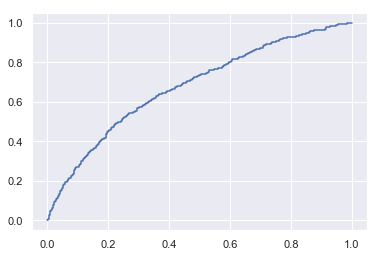

In [38]:
from sklearn import metrics

#y_t1_b = [1 if i == 'poor' else 0 for i in y_t1 ]

y_pred_proba1 = log2_model.predict_proba(X_t1)[::,1]
fpr, tpr,_ = metrics.roc_curve(y_t1, y_pred_proba1)     #false positive rate, true positive rate

plt.plot(fpr, tpr)
plt.show()

### Model is bad. Try first doing some feature selection.

In [39]:
log2_model2 = LogisticRegression(solver='liblinear') #lbfgs/liblinear is default

In [40]:
from sklearn.feature_selection import RFE

In [41]:
rfe1 = RFE(log2_model2,n_features_to_select=6)

In [42]:
rfe1.fit(X_tr1,y_tr1)
print(rfe1.ranking_)
print(rfe1.support_)

[ 1  6 37 42 38  1 25 10 50 29  1 49 13 26 21 12 14 19  3  1  8  9 44  5
  4  1  7  2  1 32 24 23 27 33 16 20 11 17 18 22 30 15 43 36 47 48 31 28
 51 41 40 39 34 45 46 35 52 53]
[ True False False False False  True False False False False  True False
 False False False False False False False  True False False False False
 False  True False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


In [43]:
cols = X_tr1.columns[rfe1.support_]
cols

Index(['n_tokens_title', 'num_hrefs', 'num_keywords', 'kw_avg_min',
       'kw_avg_avg', 'self_reference_avg_sharess'],
      dtype='object')

In [44]:
X_tr2, X_t2, y_tr2, y_t2 = train_test_split(dff[cols], dff['share_cat'], test_size=0.20, 
                                                    random_state=0)

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [46]:
log2_model2.fit(X_tr2,y_tr2)

y_p_tr2= log2_model2.predict(X_tr2)
y_p_t2= log2_model2.predict(X_t2)

acc_score_tr2 = accuracy_score(y_tr2, y_p_tr2)
acc_score_t2 = accuracy_score(y_t2, y_p_t2)

print("Acc Score on traning set: {}".format(acc_score_tr2))
print("Acc Score on testing set: {}".format(acc_score_t2)) 
print("")

bacc_score_tr2 = balanced_accuracy_score(y_tr2, y_p_tr2)
bacc_score_t2 = balanced_accuracy_score(y_t2, y_p_t2)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr2))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t2)) 
print("")

precision_tr2 = precision_score(y_tr2, y_p_tr2)
precision_t2 = precision_score(y_t2, y_p_t2)

print("Precision Score on training set: {}".format(precision_tr2))
print("Precision Score on testing set: {}".format(precision_t2)) 
print("")

recall_tr2 = recall_score(y_tr2, y_p_tr2)
recall_t2 = recall_score(y_t2, y_p_t2)

print("Recall Score on training set: {}".format(recall_tr2))
print("Recall Score on testing set: {}".format(recall_t2)) 
print("")

f1_score_tr = f1_score(y_tr2, y_p_tr2)
f1_score_t = f1_score(y_t2, y_p_t2)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.6500728508984944
Acc Score on testing set: 0.6747572815533981

Balanced Acc Score on traning set: 0.5583063150315076
Balanced Acc Score on testing set: 0.5770897718647148

Precision Score on training set: 0.5916179337231969
Precision Score on testing set: 0.6263736263736264

Recall Score on training set: 0.19771986970684038
Recall Score on testing set: 0.2313937753721245

F1 Score on training set: 0.29638671875
F1 Score on testing set: 0.33794466403162055


In [47]:
confusion_matrix(y_t2, y_p_t2)

array([[1219,  102],
       [ 568,  171]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_t2, y_p_t2))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78      1321
           1       0.63      0.23      0.34       739

   micro avg       0.67      0.67      0.67      2060
   macro avg       0.65      0.58      0.56      2060
weighted avg       0.66      0.67      0.62      2060



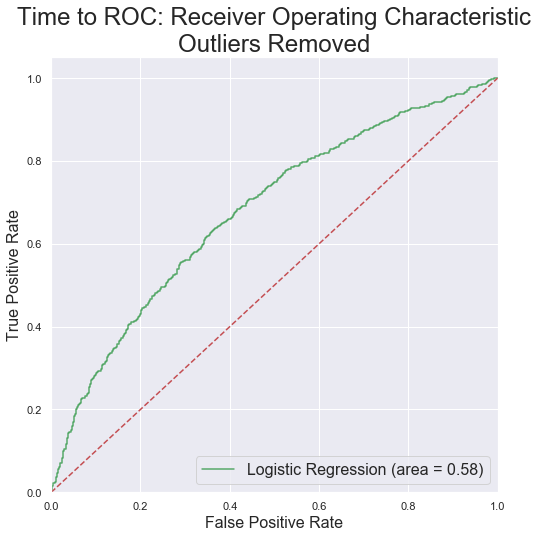

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_t2, y_p_t2)
fpr, tpr, thresholds = roc_curve(y_t2, log2_model2.predict_proba(X_t2)[:,1])

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='g' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Removed',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# What if we eliminated NO outliers...

In [50]:
df1 = df.copy()

In [52]:
df1 = df.copy()
df1.drop(['url','timedelta'],axis=1,inplace=True)
ser, bins = pd.qcut(df1["shares"], [0,0.6,1.0], retbins=True, labels=['poor','good'])
df1['share_cat'] = pd.cut(df1["shares"], bins=bins, labels=[0,1], include_lowest=True)
df1.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,share_cat
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [53]:
df1.drop(['shares'],axis=1,inplace=True)

In [54]:
X_tr3a, X_t3a, y_tr3a, y_t3a = train_test_split(df1.drop('share_cat',axis=1), df1['share_cat'], test_size=0.20, 
                                                    random_state=0)

In [55]:
log_model3 = LogisticRegression(solver='liblinear')
rfe3 = RFE(log_model3,n_features_to_select=6)
rfe3.fit(X_tr3a,y_tr3a)
print(rfe3.ranking_)
print(rfe3.support_)

[30 35  3 12  1 28 27 29 32 25 24 53  1 46  1  5  8 33 39 38 49 41 42 36
 37 34 48 47 40 16 14 13 15 45  9 10  1 11 22  1  4 23  1 51 50 44 19 26
 20  2 31  6 18 21 52  7 17 43]
[False False False False  True False False False False False False False
  True False  True False False False False False False False False False
 False False False False False False False False False False False False
  True False False  True False False  True False False False False False
 False False False False False False False False False False]


In [56]:
cols = X_tr3a.columns[rfe3.support_]
X_tr3, X_t3, y_tr3, y_t3 = train_test_split(df1[cols], df1['share_cat'], test_size=0.20, 
                                                    random_state=0)


cols

Index(['n_non_stop_unique_tokens', 'data_channel_is_entertainment',
       'data_channel_is_socmed', 'is_weekend', 'LDA_02',
       'global_subjectivity'],
      dtype='object')

In [57]:
log_model3.fit(X_tr3,y_tr3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
y_p_tr3= log_model3.predict(X_tr3)
y_p_t3= log_model3.predict(X_t3)

acc_score_tr3 = accuracy_score(y_tr3, y_p_tr3)
acc_score_t3 = accuracy_score(y_t3, y_p_t3)

print("Acc Score on traning set: {}".format(acc_score_tr3))
print("Acc Score on testing set: {}".format(acc_score_t3)) 
print("")

bacc_score_tr3 = balanced_accuracy_score(y_tr3, y_p_tr3)
bacc_score_t3 = balanced_accuracy_score(y_t3, y_p_t3)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr3))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t3)) 
print("")

precision_tr3 = precision_score(y_tr3, y_p_tr3)
precision_t3 = precision_score(y_t3, y_p_t3)

print("Precision Score on training set: {}".format(precision_tr3))
print("Precision Score on testing set: {}".format(precision_t3)) 
print("")

recall_tr3 = recall_score(y_tr3, y_p_tr3)
recall_t3 = recall_score(y_t3, y_p_t3)

print("Recall Score on training set: {}".format(recall_tr3))
print("Recall Score on testing set: {}".format(recall_t3)) 
print("")

f1_score_tr = f1_score(y_tr3, y_p_tr3)
f1_score_t = f1_score(y_t3, y_p_t3)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.6416522150402018
Acc Score on testing set: 0.6477487703367385

Balanced Acc Score on traning set: 0.5642004342610327
Balanced Acc Score on testing set: 0.5669576802664451

Precision Score on training set: 0.5860913280268119
Precision Score on testing set: 0.5941780821917808

Recall Score on training set: 0.22958890621153688
Recall Score on testing set: 0.23033521407235313

F1 Score on training set: 0.3299333765697777
F1 Score on testing set: 0.33197799569480985


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_t3, y_p_t3))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76      4916
           1       0.59      0.23      0.33      3013

   micro avg       0.65      0.65      0.65      7929
   macro avg       0.63      0.57      0.55      7929
weighted avg       0.63      0.65      0.60      7929



In [60]:
confusion_matrix(y_t3, y_p_t3)

array([[4442,  474],
       [2319,  694]], dtype=int64)

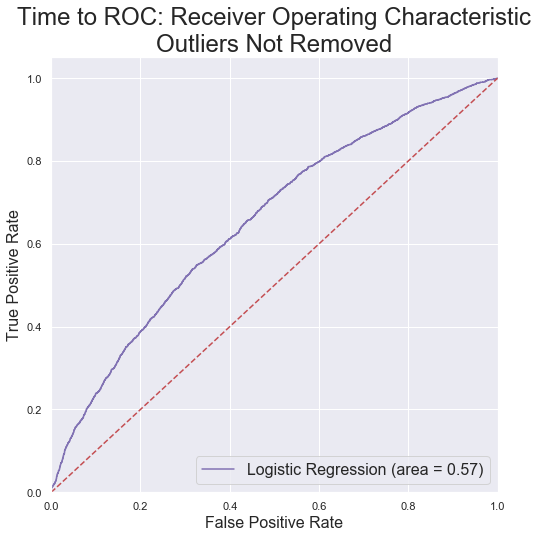

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_t3, y_p_t3)
fpr, tpr, thresholds = roc_curve(y_t3, log_model3.predict_proba(X_t3)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='m' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Not Removed',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

# RANDOM FOREST

In [62]:
from sklearn.ensemble import RandomForestClassifier

ks_rf = RandomForestClassifier().fit(X_tr3,y_tr3)

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [63]:
y_p_t_RF = ks_rf.predict(X_t3)
confusion_matrix(y_t3,y_p_t_RF)

array([[3903, 1013],
       [2036,  977]], dtype=int64)

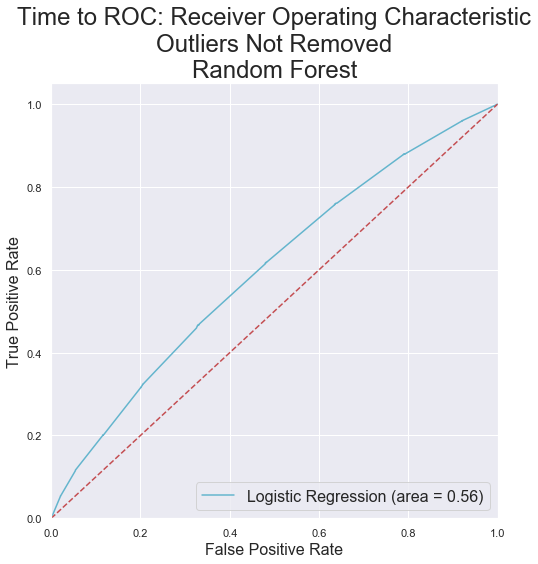

In [64]:
y_pred_proba_RF = ks_rf.predict_proba(X_t3)[:,1]

logit_roc_auc = roc_auc_score(y_t3, y_p_t_RF)

fpr, tpr, thresholds = roc_curve(y_t3, y_pred_proba_RF)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='c' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Not Removed\nRandom Forest',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()


## Random Forest with Outliers Removed

In [65]:
df2 = df.copy()

columns_out = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords',
              'kw_min_min', 'kw_max_min',"kw_avg_min", "kw_min_max", "kw_max_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares",
               "self_reference_avg_sharess"]

for n in columns_out:
    print(n)
    
    q = iqr_fun(n,df2)
    df2 = df2[(df2[n]<=q[1]) & (df2[n]>=q[0])  ]

n_tokens_title
3.0 17.0
n_tokens_content
-460.0 1422.0
num_hrefs
-11.0 27.0
num_self_hrefs
-5.0 9.0
num_imgs
-1.0 5.0
num_videos
-3.0 3.0
num_keywords
1.0 15.0
kw_min_min
-9.0 13.0
kw_max_min
-419.0 1851.0
kw_avg_min
-127.0 533.0
kw_min_max
-12601.0 21001.0
kw_max_max
843299.0 843301.0
kw_avg_max
9624.0 521906.0
kw_min_avg
-2367.0 3944.0
kw_max_avg
887.0 7933.0
kw_avg_avg
1092.0 4223.0
self_reference_min_shares
-1896.0 4978.0
self_reference_max_shares
-4169.0 9221.0
self_reference_avg_sharess
-1876.0 4966.0


In [66]:
sMaxQ

5581.0

In [68]:
df2 = df2[df2.shares<=sMaxQ+1000]
df2.reset_index(drop=True, inplace=True)
df2.drop(['url','timedelta'],axis=1,inplace=True)



KeyError: "['url' 'timedelta'] not found in axis"

In [69]:

ser, bins = pd.qcut(df2["shares"], [0,0.6,1.], retbins=True, labels=['poor','good'])
df2['share_cat'] = pd.cut(df2["shares"], bins=bins, labels=[0,1], include_lowest=True)
df2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,share_cat
0,8.0,166.0,0.644172,1.0,0.838384,5.0,1.0,0.0,0.0,4.993976,...,0.5,0.000000,0.0,0.000,0.000,0.000,0.500,0.000,2600,1
1,10.0,847.0,0.424608,1.0,0.604167,8.0,0.0,1.0,0.0,4.853601,...,1.0,-0.185049,-0.4,-0.125,0.225,-0.175,0.275,0.175,186,0
2,7.0,245.0,0.616667,1.0,0.762821,8.0,5.0,1.0,0.0,4.767347,...,0.5,-0.341667,-0.5,-0.125,0.000,0.000,0.500,0.000,1000,0
3,11.0,107.0,0.761905,1.0,0.893939,3.0,1.0,0.0,2.0,4.383178,...,1.0,0.000000,0.0,0.000,0.400,-0.300,0.100,0.300,805,0
4,8.0,205.0,0.648780,1.0,0.760563,7.0,3.0,1.0,0.0,5.565854,...,0.6,-0.508333,-0.9,-0.125,0.000,0.000,0.500,0.000,791,0


In [70]:
df2.drop(['shares'],axis=1,inplace=True)

In [71]:
X_tr4a, X_t4a, y_tr4a,y_t4a = train_test_split(df2.drop('share_cat',axis=1), df2['share_cat'], test_size=0.2)

In [72]:
log_model4 = LogisticRegression(solver='liblinear')

rfe4 = RFE(log_model4,n_features_to_select=8)
rfe4.fit(X_tr4a,y_tr4a)
print(rfe4.ranking_)
print(rfe4.support_)

[ 1  4 34 43 35  1 23  8 25 29  1 49 11 22 20 10 12 51  1  1  7  6 50  3
  2  1  5  1  1 30 21 18 26 31 14 17  9 16 15 19 28 13 39 33 45 48 27 24
 46 38 40 36 32 41 42 37 47 44]
[ True False False False False  True False False False False  True False
 False False False False False False  True  True False False False False
 False  True False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


In [73]:
cols = X_tr4a.columns[rfe4.support_]
X_tr4, X_t4, y_tr4, y_t4 = train_test_split(df2[cols], df2['share_cat'], test_size=0.20, 
                                                    random_state=0)


cols

Index(['n_tokens_title', 'num_hrefs', 'num_keywords', 'kw_max_min',
       'kw_avg_min', 'kw_avg_avg', 'self_reference_max_shares',
       'self_reference_avg_sharess'],
      dtype='object')

In [74]:


ks_rf4 = RandomForestClassifier().fit(X_tr4,y_tr4)

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [75]:
y_p_t_RF4 = ks_rf4.predict(X_t4)
confusion_matrix(y_t4,y_p_t_RF4)

array([[1089,  232],
       [ 514,  225]], dtype=int64)

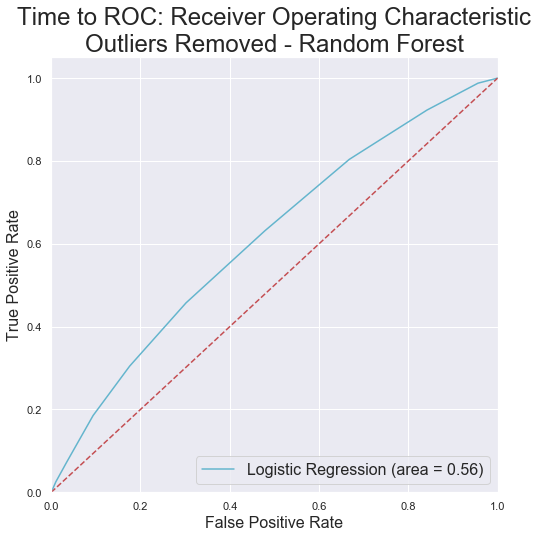

In [76]:
y_pred_proba_RF4 = ks_rf4.predict_proba(X_t4)[:,1]

logit_roc_auc = roc_auc_score(y_t4, y_p_t_RF4)

fpr, tpr, thresholds = roc_curve(y_t4, y_pred_proba_RF4)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='c' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Removed - Random Forest',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

# Support Vector Machines

In [77]:
from sklearn import svm

In [78]:
clf = svm.SVC(gamma='auto')
clf.fit(X_tr1, y_tr1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
clf.score(X_t1, y_t1)

0.6315533980582524